# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 分析过程

### 一.数据读取与准备工作

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data=pd.read_csv("house_price.csv")
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#在数据清洗前先拷贝一份数据
clean_data=original_data.copy()
clean_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 二.数据的评估与清洗

#### 1.结构性问题

In [4]:
clean_data.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
443,3220000,4320,3,1,1,no,no,no,no,no,1,no,unfurnished
304,4193000,8250,3,1,1,yes,no,yes,no,no,3,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
356,3773000,2520,5,2,1,no,no,yes,no,yes,1,no,furnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
140,5740000,5800,3,2,4,yes,no,no,no,yes,0,no,unfurnished
378,3640000,2275,3,1,3,yes,no,no,yes,yes,0,yes,semi-furnished
288,4200000,5040,3,1,2,yes,no,yes,no,yes,0,no,unfurnished
138,5740000,5000,3,1,3,yes,no,no,no,yes,0,no,semi-furnished
102,6195000,5500,3,2,4,yes,yes,no,no,yes,1,no,semi-furnished


随机取样10行发现数据并不存在结构上的问题

#### 2.内容性问题

#### （1）缺失数据

In [5]:
#使用info方法
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


观察发现并没有缺失的数据，但最好把所有分类变量的数据转换为category类型

In [6]:
clean_data["mainroad"]=clean_data["mainroad"].astype('category')
clean_data["guestroom"]=clean_data["guestroom"].astype('category')
clean_data["basement"]=clean_data["basement"].astype('category')
clean_data["hotwaterheating"]=clean_data["hotwaterheating"].astype('category')
clean_data["airconditioning"]=clean_data["airconditioning"].astype('category')
clean_data["prefarea"]=clean_data["prefarea"].astype('category')
clean_data["furnishingstatus"]=clean_data["furnishingstatus"].astype('category')

In [7]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### （2）重复数据

由于所有变量均允许存在重复的情况，故无需检查重复数据

#### （3）不一致数据

所有数据中mainroad、guestroom、basement、hotwaterheating、airconditioning、prefarea以及furnishingstatus可能存在不一致的情况，需要逐个检查

In [8]:
clean_data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
clean_data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [10]:
clean_data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [11]:
clean_data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [12]:
clean_data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [13]:
clean_data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
clean_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

观察发现上述数据均不存在不一致的情况

#### （4）无效数据

In [15]:
#使用describe方法
clean_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


观察发现并不存在不符合常理的数据

#### （5）保存数据

In [16]:
clean_data.to_csv("./house_price_cleaned.csv",index=False)

### 三.数据可视化

In [17]:
#设置色盘
sns.set_palette("pastel")

#### 1.单独分析房屋价格分布

对于房屋价格，我们可以绘制频率分布直方图、密度图、箱型图以及小提琴图

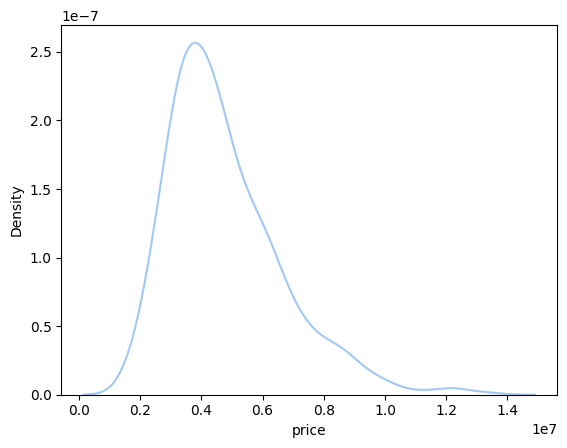

In [18]:
#绘制密度图
sns.kdeplot(clean_data["price"])
plt.show()

从图中可以看到，房屋价格大致呈正偏态

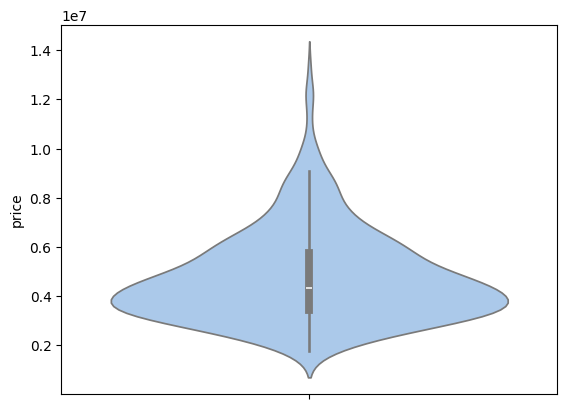

In [19]:
#绘制小提琴图
sns.violinplot(clean_data["price"])
plt.show()

观察小提琴图可以得出同样的结论

#### 2.其他数值变量与房屋价格的关系

对于数值变量，我们可以绘制散点图来直观分析该变量对于房屋价格的影响

#### （1）房屋面积

<Axes: xlabel='area', ylabel='price'>

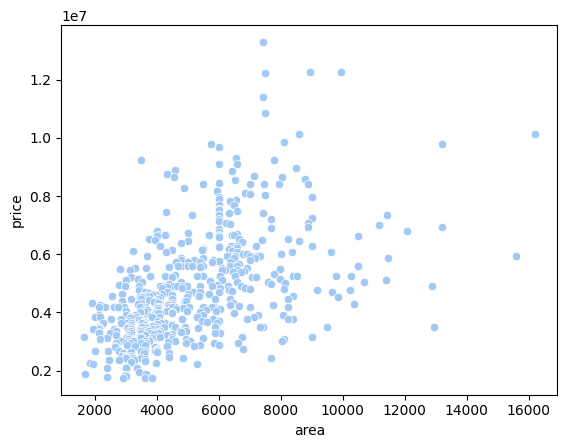

In [20]:
sns.scatterplot(clean_data,x="area",y="price")

从图中可以看出，面积与房屋价格大致呈正相关

#### （2）卧室数

由于卧室数为有限几个数值，因此我们可以绘制条形图来分析不同卧室数对应的房屋的平均价格

<Axes: xlabel='bedrooms', ylabel='price'>

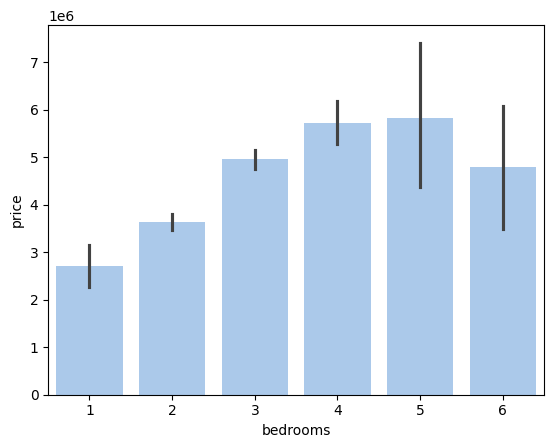

In [21]:
sns.barplot(clean_data,x="bedrooms",y="price")

观察可以发现，卧室数从1到5递增时，房屋价格的平均数同样递增；卧室数从5到6时，房屋价格的平均数不增反降

#### （3）厕所数

与卧室数一样，同样可以绘制条形图

<Axes: xlabel='bathrooms', ylabel='price'>

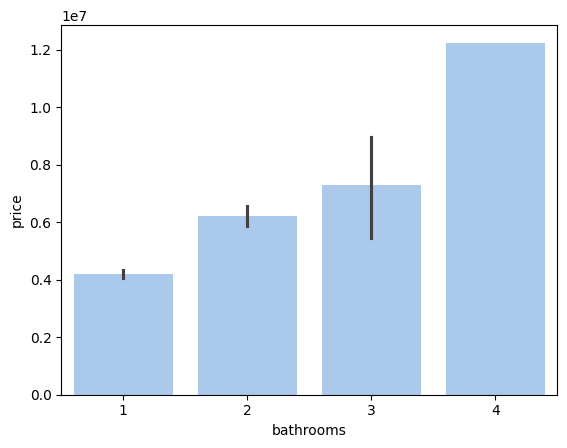

In [22]:
sns.barplot(clean_data,x="bathrooms",y="price")

从图中可以看出，随着厕所数的增加，房屋价格的平均数也增加

#### （4）楼层数

<Axes: xlabel='stories', ylabel='price'>

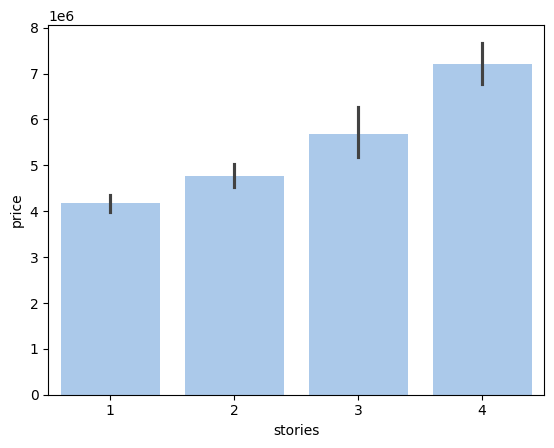

In [23]:
sns.barplot(clean_data,x="stories",y="price")

从图中可以看出，随着楼层数的增加，房屋价格的平均数也在增加

#### （5）车库数量

<Axes: xlabel='parking', ylabel='price'>

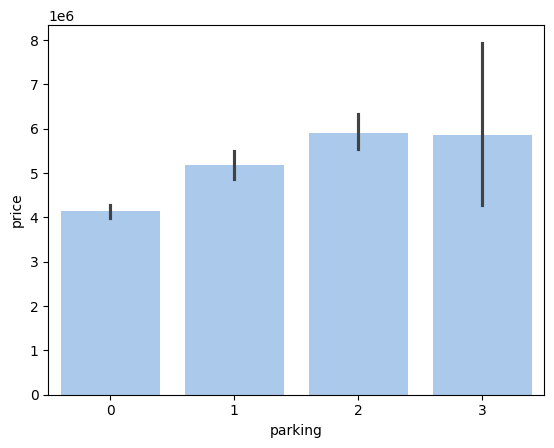

In [24]:
sns.barplot(clean_data,x="parking",y="price")

观察可以发现，随着车库数量增加，房屋的平均价格也随之增加，车库数量为2的房屋的平均价格与车库数量为3的房屋的平均价格相近

#### （6）配对图

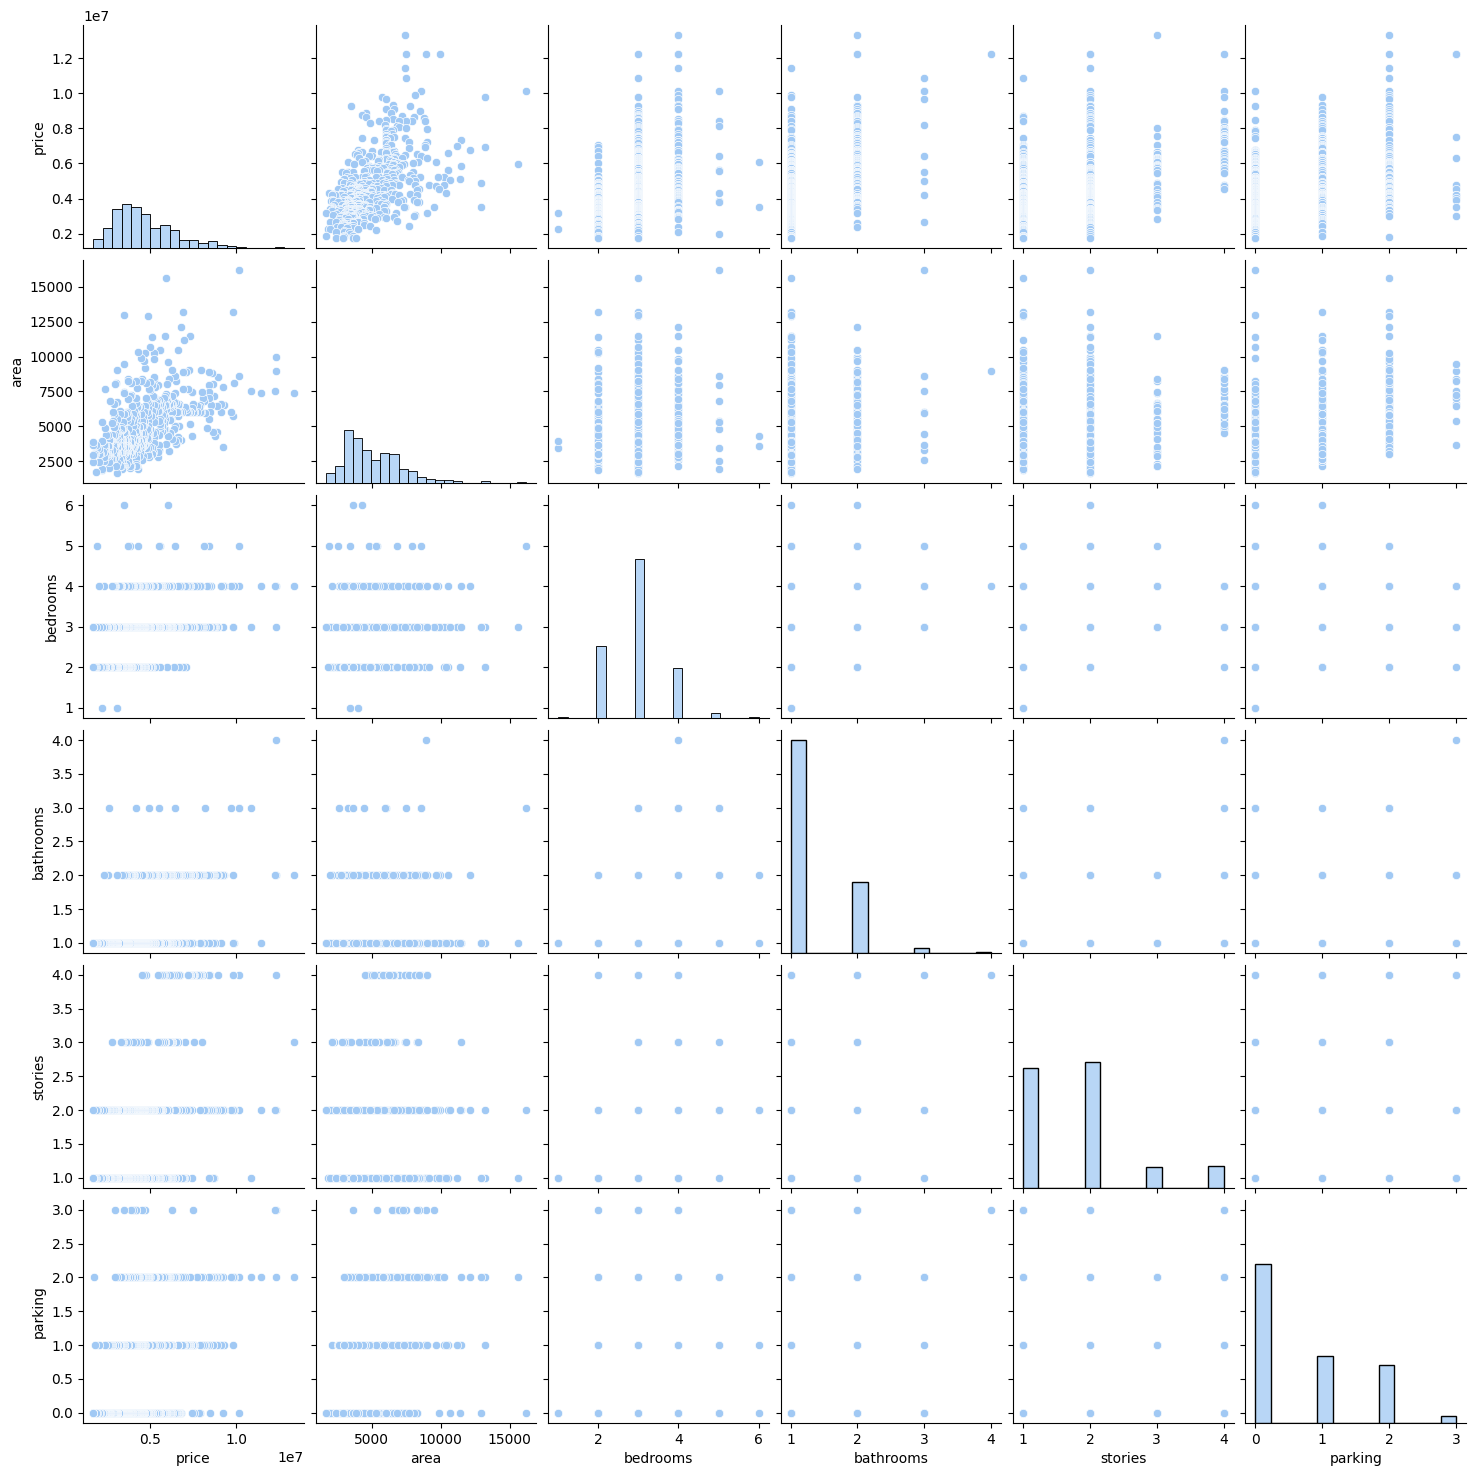

In [25]:
sns.pairplot(clean_data)

#### 3.其他分类变量对房屋价格的影响

对于分类变量，我们同样可以绘制条形图

#### （1）是否位于主路

<Axes: xlabel='mainroad', ylabel='price'>

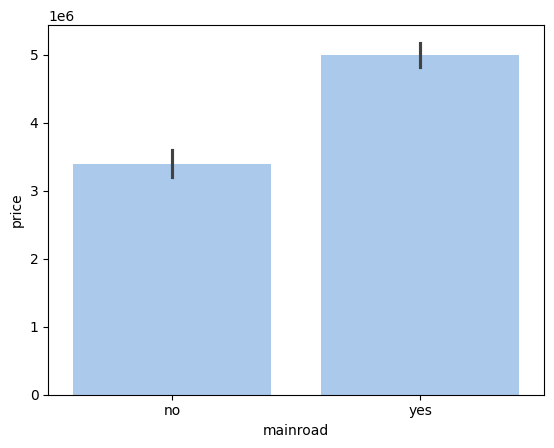

In [26]:
sns.barplot(clean_data,x="mainroad",y="price")

观察上图可以发现，位于主路的房屋的平均价格更高

#### （2）是否有客房

<Axes: xlabel='guestroom', ylabel='price'>

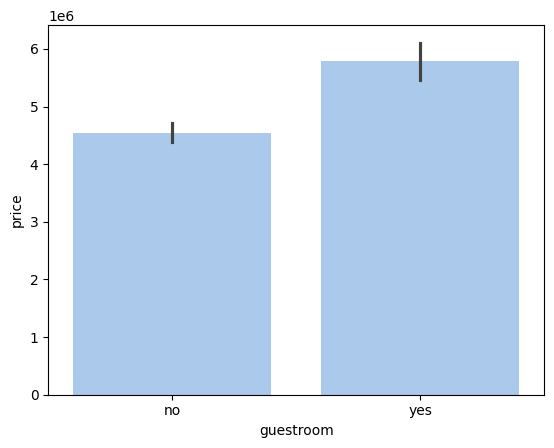

In [27]:
sns.barplot(clean_data,x="guestroom",y="price")

可以发现，有客房的房屋的平均价格要高于没有客房的房屋

#### （3）是否有地下室

<Axes: xlabel='basement', ylabel='price'>

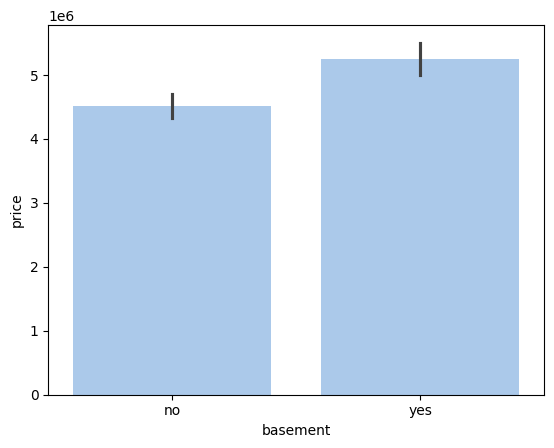

In [28]:
sns.barplot(clean_data,x="basement",y="price")

可以发现，有地下室的房屋的平均价格高于没有地下室的房屋

#### （4）是否有热水器

<Axes: xlabel='hotwaterheating', ylabel='price'>

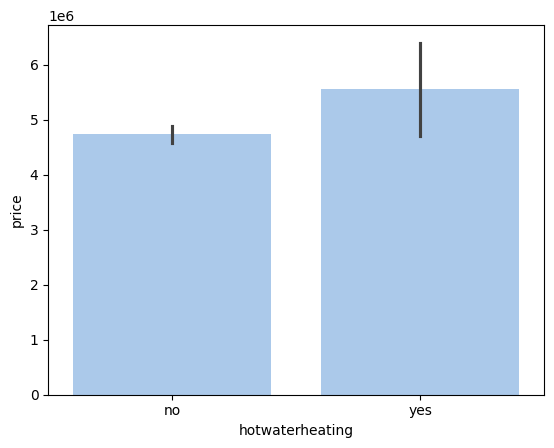

In [29]:
sns.barplot(clean_data,x="hotwaterheating",y="price")

有热水器的房屋的平均价格高于没有热水器的房屋

#### （5）是否有空调

<Axes: xlabel='airconditioning', ylabel='price'>

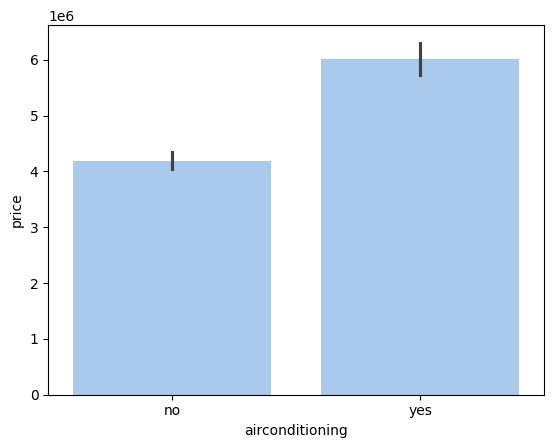

In [30]:
sns.barplot(clean_data,x="airconditioning",y="price")

有空调的房屋的平均价格高于没有空调的房屋

#### （6）是否位于城市首选社区

<Axes: xlabel='prefarea', ylabel='price'>

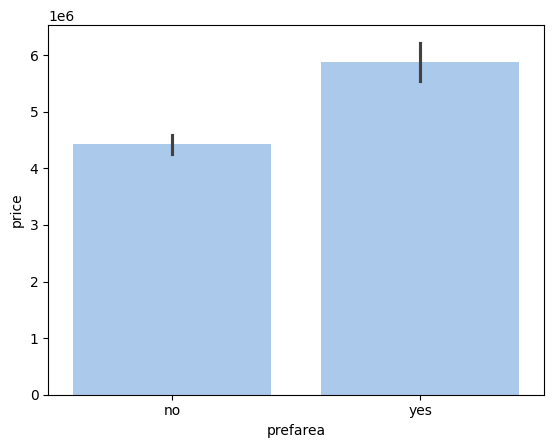

In [31]:
sns.barplot(clean_data,x="prefarea",y="price")

位于城市首选社区的房屋的平均价格要高于不位于城市首选社区的房屋

#### （7）装修状态

<Axes: xlabel='furnishingstatus', ylabel='price'>

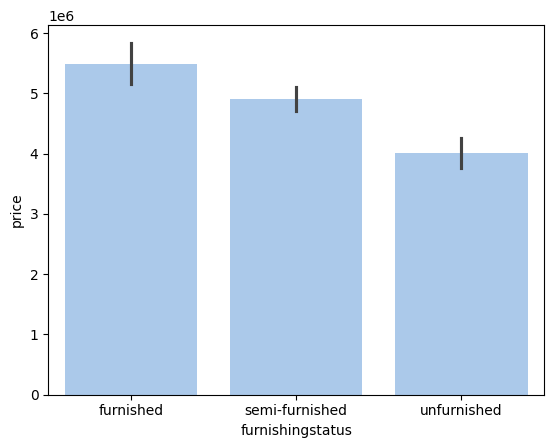

In [32]:
sns.barplot(clean_data,x="furnishingstatus",y="price")

观察发现，精装的房屋的平均价格最高，简装的房屋次之，毛坯的最低

#### （8）热力图

In [33]:
heat_df=clean_data[["price","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]]
heat_df.head()

,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,yes,no,no,no,yes,yes,furnished
1,12250000,yes,no,no,no,yes,no,furnished
2,12250000,yes,no,yes,no,no,yes,semi-furnished
3,12215000,yes,no,yes,no,yes,yes,furnished
4,11410000,yes,yes,yes,no,yes,no,furnished


### 四.回归模型建立

In [34]:
import statsmodels.api as sm

#### 1.将分类变量转换为虚拟变量

In [35]:
#首先复制一份数据
house_price=clean_data.copy()
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
house_price=pd.get_dummies(house_price,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],dtype=int,drop_first=True)
house_price.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


#### 2.检查变量之间的线性相关性

使用DataFrame的corr方法,abs表示取绝对值，一般认为相关系数的绝对值大于0.8时相关性较强，因此可以加上一个判断，得到一个bool类型的DataFrame，方便观察

In [37]:
house_price.corr().abs()>0.8

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False
area,False,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,False,True,False,False,False,False


同样也可以绘制热力图来直观分析

<Axes: >

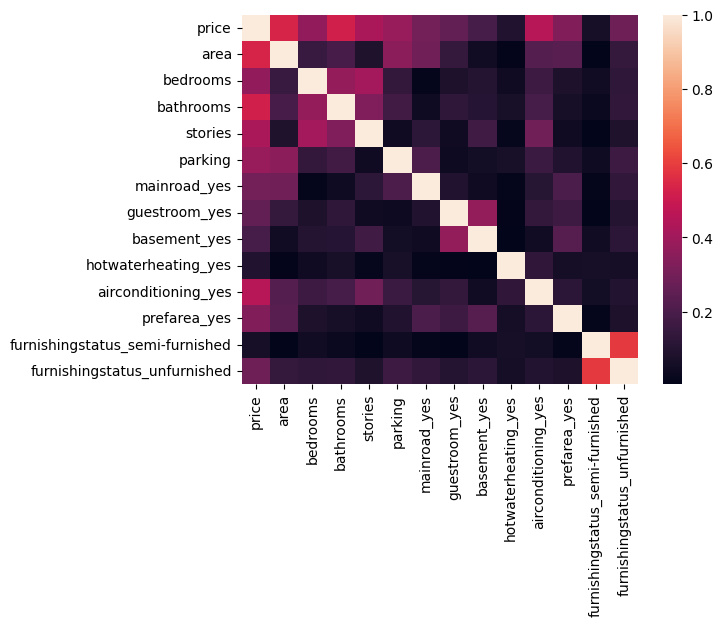

In [38]:
sns.heatmap(house_price.corr().abs())

结论为任意两个自变量之间并没有很强的线性相关性，暂时没有共线性的风险，可以提取出自变量和因变量

#### 3.提取自变量和因变量

In [39]:
#因变量
y=house_price["price"]
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [40]:
#自变量
X=house_price.drop(["price"],axis=1)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


#### 4.添加截距

使用add_constant函数

In [41]:
X=sm.add_constant(X)
X.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0


#### 5.建立回归模型

In [42]:
model=sm.OLS(y,X).fit()

In [43]:
#汇总展示结果
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Wed, 13 Aug 2025   Prob (F-statistic):          9.07e-123
Time:                        18:47:37   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

接下来观察各个变量的P值大小，P值越小代表该变量对于因变量的影响越显著。观察发现截距const、bedrooms、furnishingstatus_semi_furnished的P值明显大于显著水平0.05，并且R^2的值为0.682，说明该回归方程的拟合度并不是很好，因此需要去除这些数据重新建立回归模型

In [44]:
X=X.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)
X.head()

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0


In [45]:
model=sm.OLS(y,X).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Wed, 13 Aug 2025   Prob (F-statistic):                        0.00
Time:                        18:47:37   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

重新建立回归方程后，R^2提高到了0.957，并且所有自变量的P值均小于显著水平0.05，说明重新建立的回归方程更加符合实际

#### 6.对房价进行预测

首先根据提供的信息创建一个DataFrame

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [47]:
to_predict=pd.DataFrame({"area":6500,"bedrooms":4,"bathrooms":2,"stories":2,"mainroad":"no","guestroom":"no","basement":"yes","hotwaterheating":"yes","airconditioning":"no","parking":2,"prefarea":"yes","furnishingstatus":"semi-furnished"},index=[1])
to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


由于所创建的DataFrame里各分类变量只包含一种情况，所以需要调用Categorical函数

In [48]:
to_predict["mainroad"]=pd.Categorical(to_predict["mainroad"],categories=['no','yes'])
to_predict["guestroom"]=pd.Categorical(to_predict["guestroom"],categories=['no','yes'])
to_predict["basement"]=pd.Categorical(to_predict["basement"],categories=['no','yes'])
to_predict["hotwaterheating"]=pd.Categorical(to_predict["hotwaterheating"],categories=['no','yes'])
to_predict["airconditioning"]=pd.Categorical(to_predict["airconditioning"],categories=['no','yes'])
to_predict["prefarea"]=pd.Categorical(to_predict["prefarea"],categories=['no','yes'])
to_predict["furnishingstatus"]=pd.Categorical(to_predict["basement"],categories=['furnished','semi-furnished','unfurnished'])

然后将分类变量转换为虚拟变量

In [49]:
to_predict_final=pd.get_dummies(to_predict,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],dtype=int,drop_first=True)
to_predict_final.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
1,6500,4,2,2,2,0,0,1,1,0,1,0,0


In [52]:
to_predict_final=to_predict_final.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [53]:
to_predict_final

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
1,6500,2,2,2,0,0,1,1,0,1,0


最后将处理好的DataFrame传入predict方法

In [54]:
price=model.predict(to_predict_final)
print(price)

1    7.303754e+06
dtype: float64


计算得到的房价为：7303754元

### 五.结论

经过数据评估与整理、数据可视化、线性回归模型建立等一系列步骤，最终得出该房子预测的价格为7303754元